 Author: Lourde Hajjar

 The notebook applies CNN on the original (raw data ) image dataset. It preprocesses the data by normalizing images and resizing to 256x256, builds a  (CNN) model, and trains it.
 
 The model's performance is evaluated using validation accuracy during training and 10-fold cross-validation, achieving outstanding results with accuracy of 99.27%. It also visualizes training progress with loss and accuracy plots.

## Basic CNN Without Augmentation 

## Import Libraries

In [18]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

## Load the original balanced dataset

In [ ]:
# Define dataset path
data_dir =r"C:\Users\lourd\OneDrive\Desktop\coursework\datasets\3_image\processed\3_og_b"


images = []
labels = []


# Load images 
for label in os.listdir(data_dir):
    label_dir = os.path.join(data_dir, label)
    if os.path.isdir(label_dir):
        for img_file in os.listdir(label_dir):
            img_path = os.path.join(label_dir, img_file)
            img = load_img(img_path, color_mode="grayscale")
            img = load_img(img_path, target_size=(256, 256), color_mode="grayscale")
            img_array = img_to_array(img) / 255.0  # Normalize
            images.append(img_array)
            labels.append(label)


images = np.array(images)
labels = np.array(labels)

class_names = ['normal', 'malignant', 'benign']


images = images.reshape(-1, 256, 256, 1)

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(images, encoded_labels, test_size=0.2, random_state=42)


## Define the Model

In [20]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(256, 256, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 64)      640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 246016)            0         
                                                                 
 dense_4 (Dense)             (None, 128)              

## Train the model and plot accuracy/loss graphs

Epoch 1/20
34/34 [==============================] - 21s 601ms/step - loss: 1.0005 - accuracy: 0.6952 - val_loss: 0.1572 - val_accuracy: 0.9630
Epoch 2/20
34/34 [==============================] - 45s 1s/step - loss: 0.0708 - accuracy: 0.9833 - val_loss: 0.0443 - val_accuracy: 0.9889
Epoch 3/20
34/34 [==============================] - 36s 1s/step - loss: 0.0274 - accuracy: 0.9944 - val_loss: 0.0579 - val_accuracy: 0.9815
Epoch 4/20
34/34 [==============================] - 20s 577ms/step - loss: 0.0218 - accuracy: 0.9944 - val_loss: 0.0297 - val_accuracy: 0.9926
Epoch 5/20
34/34 [==============================] - 45s 1s/step - loss: 0.0177 - accuracy: 0.9935 - val_loss: 0.0890 - val_accuracy: 0.9852
Epoch 6/20
34/34 [==============================] - 21s 618ms/step - loss: 0.0261 - accuracy: 0.9944 - val_loss: 0.0344 - val_accuracy: 0.9889
Epoch 7/20
34/34 [==============================] - 22s 654ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0289 - val_accuracy: 0.9889
Epoch 8/

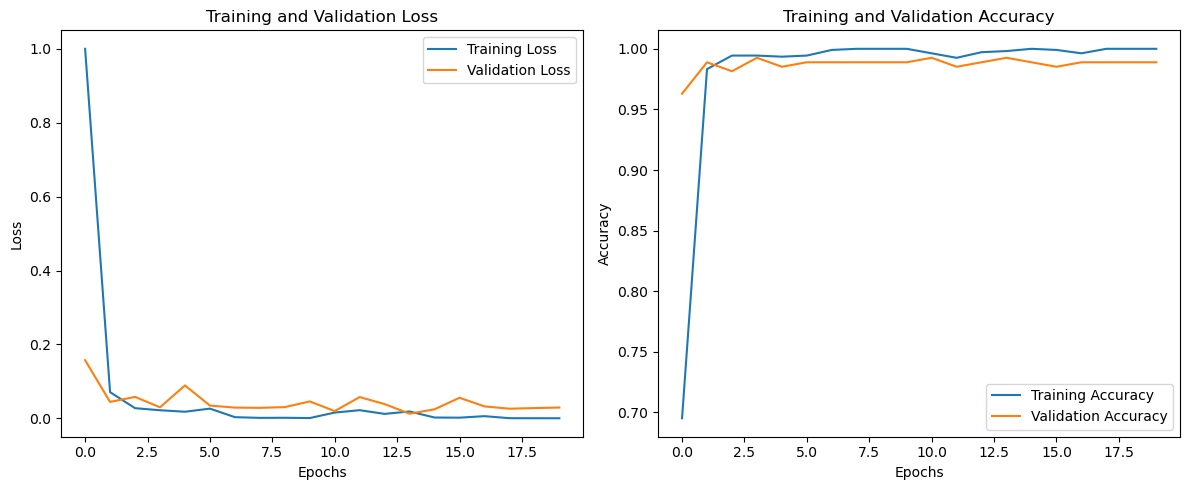

In [ ]:
# Train the model
history = model.fit(x_train, y_train, validation_split=0.2, epochs=20, batch_size=32)

# Plot Training and Validation Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
